In [26]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importing the dataset
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for Null Values

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(4), int32(2), int64(3), object(3)
memory usage: 76.7+ KB


In [30]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

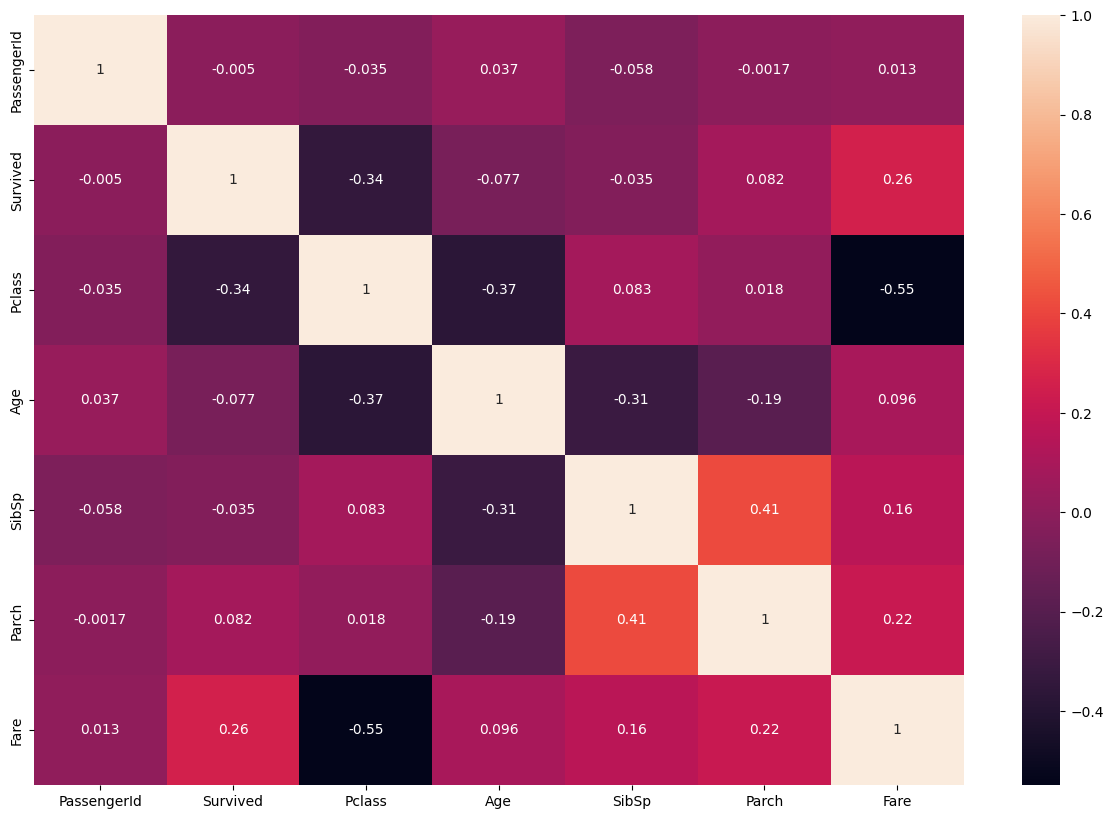

In [33]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
numeric_data = data.drop(columns=non_numeric_columns)
plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [34]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [35]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [37]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [40]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Survived', ylabel='Parch'>

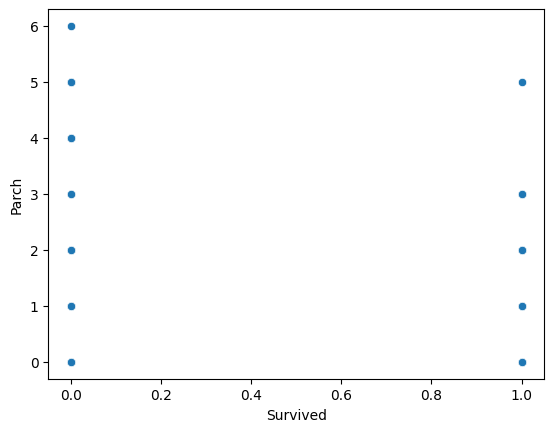

In [41]:
sns.scatterplot(x=data["Survived"],y=data["Parch"])

<Axes: xlabel='Survived', ylabel='Fare'>

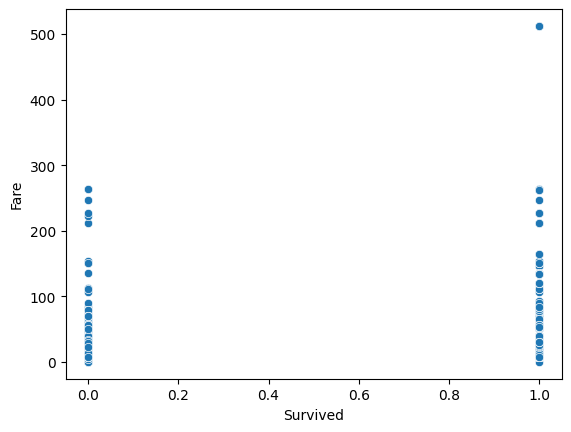

In [42]:
sns.scatterplot(x=data["Survived"],y=data["Fare"])

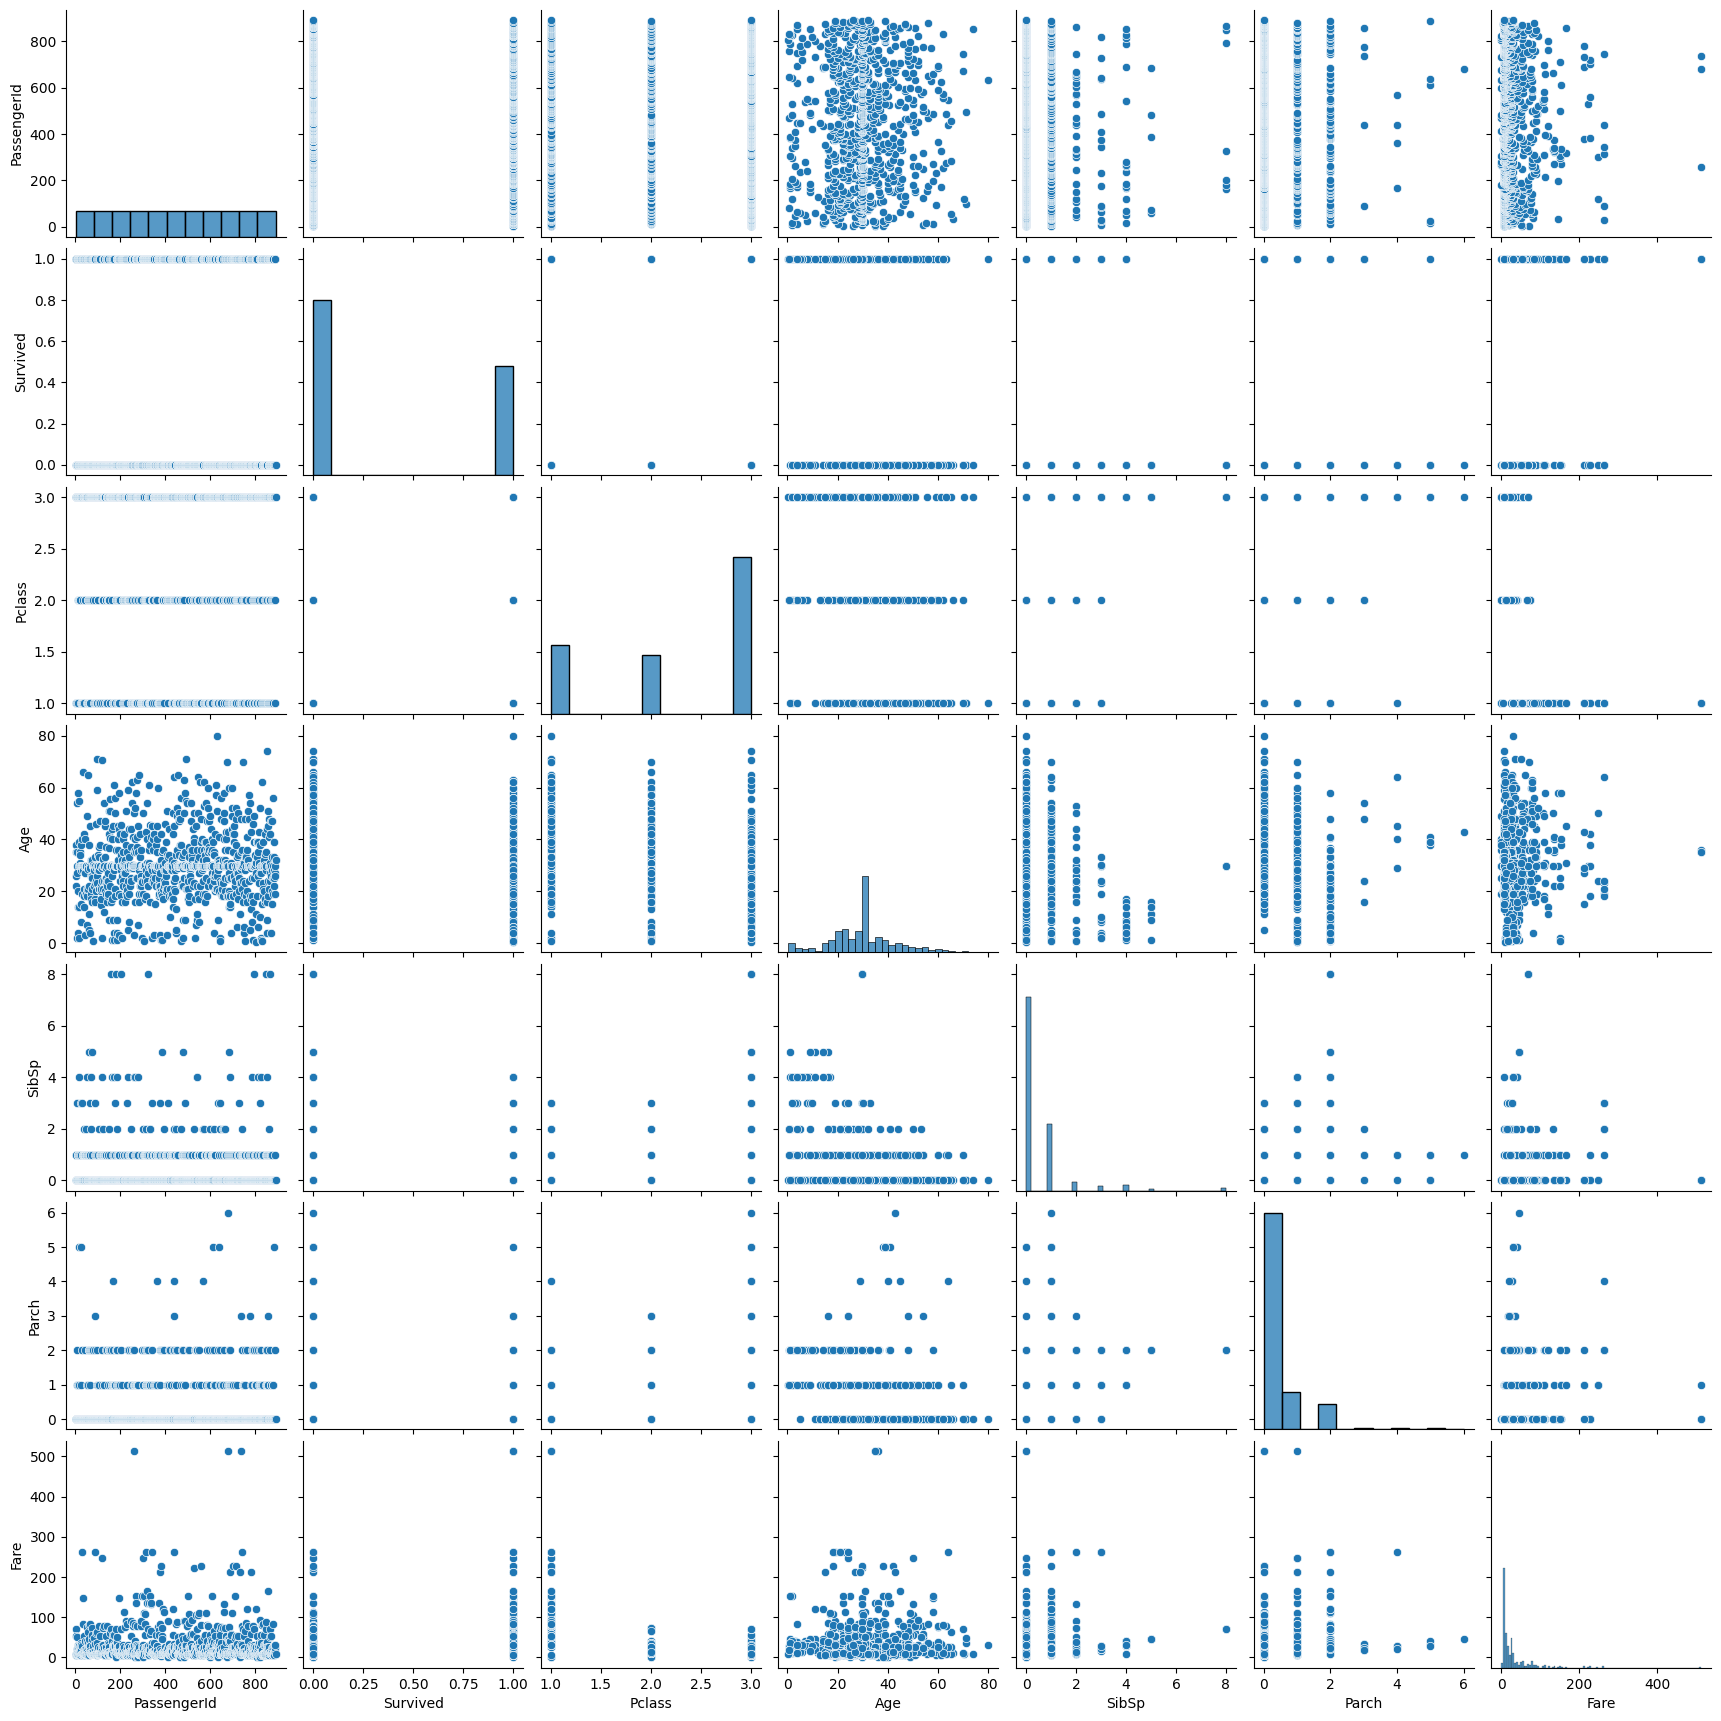

In [43]:
sns.pairplot(data)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
data["Sex"]=le.fit_transform(data["Sex"])

In [46]:
data["Embarked"]=le.fit_transform(data["Embarked"])

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


# Outlier Detection

<Axes: >

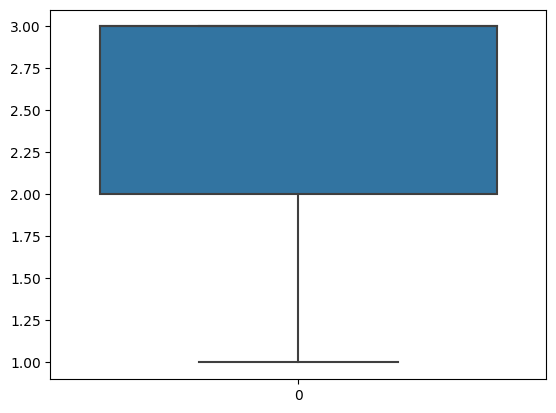

In [48]:
sns.boxplot(data['Pclass'])

<Axes: >

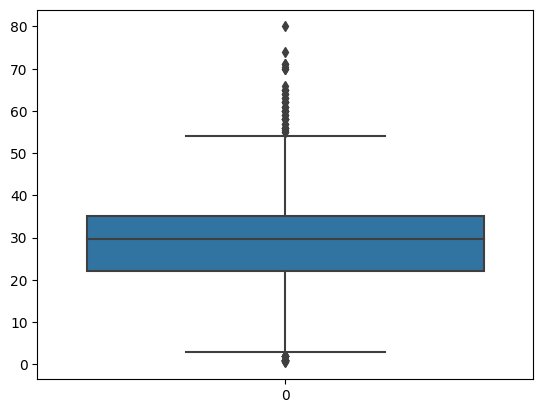

In [49]:
sns.boxplot(data['Age'])

<Axes: >

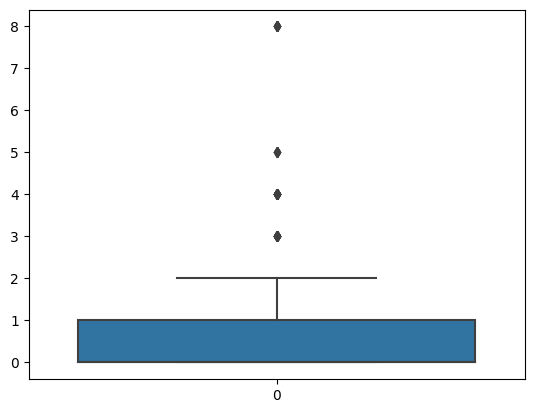

In [50]:
sns.boxplot(data['SibSp'])

<Axes: >

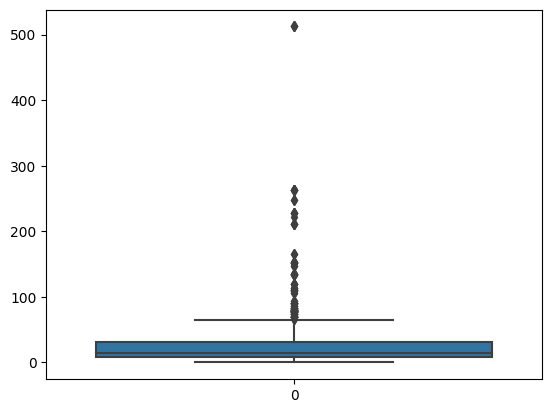

In [52]:
sns.boxplot(data['Fare'])

<Axes: >

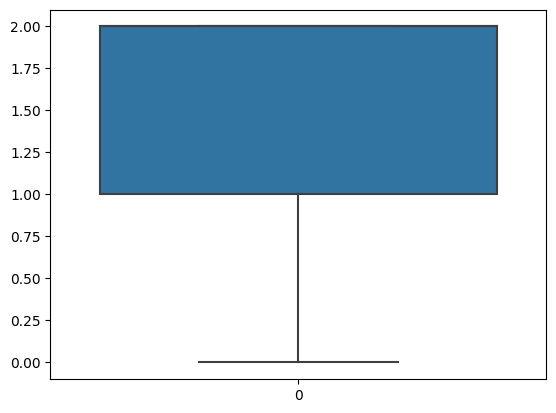

In [53]:
sns.boxplot(data['Embarked'])

In [54]:
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)
print(q1)
print(q3)

22.0
35.0


In [55]:
iqr=q3-q1
iqr

13.0

In [56]:
upperlimit = q3+1.5*iqr
upperlimit


54.5

In [57]:
lowerlimit=q1-1.5*iqr
lowerlimit

2.5

In [60]:
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
median_values = data[numeric_columns].median()
print(median_values)

Survived     0.000000
Pclass       3.000000
Age         29.699118
SibSp        0.000000
Parch        0.000000
Fare        14.454200
dtype: float64


In [61]:
data['Age']=np.where(data['Age']>upperlimit,29.699118,data['Age'])
data['Age'] = np.where(data['Age'] < lowerlimit,29.699118, data['Age'])

<Axes: >

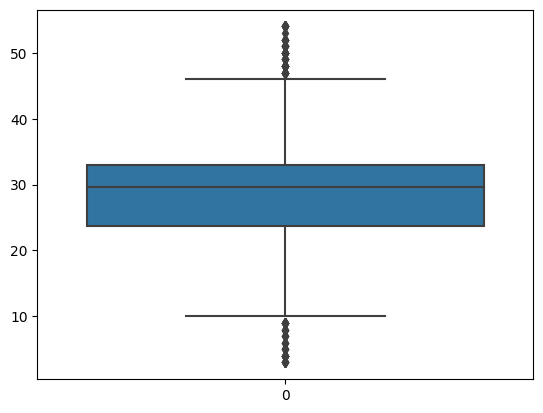

In [62]:
sns.boxplot(data['Age'])

In [63]:
q1=data.SibSp.quantile(0.25)
q3=data.SibSp.quantile(0.75)
print(q1)
print(q3)

0.0
1.0


In [64]:
iqr=q3-q1
iqr

1.0

In [65]:
upperlimit = q3+1.5*iqr
upperlimit


2.5

In [66]:
lowerlimit=q1-1.5*iqr
lowerlimit

-1.5

In [67]:
data['SibSp']=np.where(data['SibSp']>upperlimit,0.000000,data['SibSp'])

<Axes: >

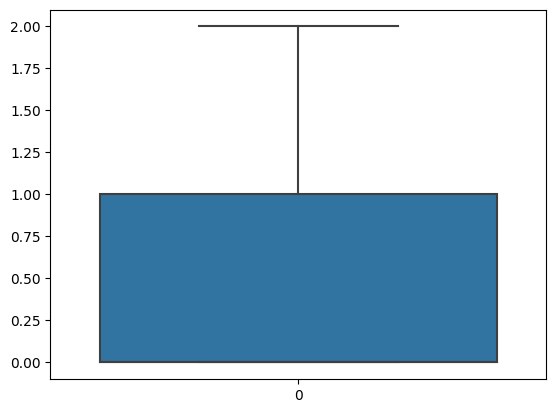

In [68]:
sns.boxplot(data['SibSp'])

In [69]:
q1=data.Parch.quantile(0.25)
q3=data.Parch.quantile(0.75)
print(q1)
print(q3)

0.0
0.0


In [70]:
iqr=q3-q1
iqr

0.0

In [71]:
upperlimit = q3+1.5*iqr
upperlimit

0.0

In [72]:
lowerlimit=q1-1.5*iqr
lowerlimit

0.0

In [73]:
data['Parch']=np.where(data['Parch']>upperlimit,0.000000,data['Parch'])

In [75]:
q1=data.Fare.quantile(0.25)
q3=data.Fare.quantile(0.75)
print(q1)
print(q3)

7.9104
31.0


In [76]:
iqr=q3-q1
iqr

23.0896

In [77]:
upperlimit = q3+1.5*iqr
upperlimit

65.6344

In [78]:
lowerlimit=q1-1.5*iqr
lowerlimit

-26.724

In [80]:
data['Fare']=np.where(data['Fare']>upperlimit,14.054150,data['Fare'])

<Axes: >

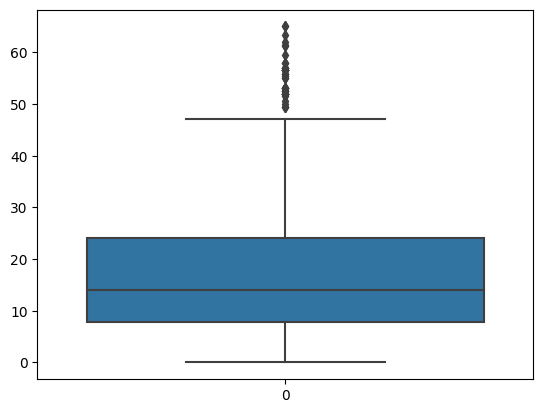

In [81]:
sns.boxplot(data.Fare)

# Splitting Dependent and Independent variables

In [82]:
y=data["Survived"]

In [83]:
X=data.drop(columns=["Name","PassengerId","Survived","Ticket","Cabin"],axis=1)

In [84]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Feature Scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [86]:
X_Scaled=ms.fit_transform(X)

In [87]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [88]:
X_Scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.372549,0.5,0.0,0.111538,1.0
1,0.0,0.0,0.686275,0.5,0.0,0.216218,0.0
2,1.0,0.0,0.450980,0.0,0.0,0.121923,1.0
3,0.0,0.0,0.627451,0.5,0.0,0.816923,1.0
4,1.0,1.0,0.627451,0.0,0.0,0.123846,1.0


# Splitting Data into Train and Test

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [90]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)
